# <center> Trabalho 02: Regressão Linear </center>
## <center> Usando a linguagem Python </center>
## <center> Taxa de consumo de oxigênio </center>

**Proposta**
* Analisar o tempo gasto para correr 1.5 milhas (em minutos) e a taxa de consumo de oxigênio (militros por minuto) em um grupo de homens envolvidos em um curso de *fitness* na N.C. State University.
* Avaliar se o modelo de regressão linear simples pode ser ajustado para as variáveis **tempo de corrida** e **taxa de consumo de oxigênio**

**Objetivo**
* Analisar e produzir um relatório contendo:
    * Análise de Dispersão
    * Análise de Distribuição
    * Correlação Linear
    * Teste de Normalidade
    * Ajuste do Modelo Linear
    * Previsão de Dados e Coeficiente de Determinação

#### Leitura do Dataset

O código abaixo realiza a leitura do arquivo com os dados referentes ao consumo de oxigênio. Para isso, será necessário utilizar o pacote ``pandas``  para a leitura dos dados. Esse pacote organiza os dados numa estrutura tabular.

In [1]:
import pandas as pd
oxygen = pd.read_table("./dataset/oxigenio.txt",sep=" ")
oxygen.head(n = 5)

,tempo,oxigenio
0,11.37,44.609
1,10.07,45.313
2,8.65,54.297
3,8.17,59.571
4,9.22,49.874


#### Análise de Dispersão dos dados

Para esta análise será construído um gráfico do consumo de oxigênio ( *eixo-y* ) por tempo de corrida ( *eixo-x* ). Para esta etapa é necessário o uso do pacote ``matplotlib``.

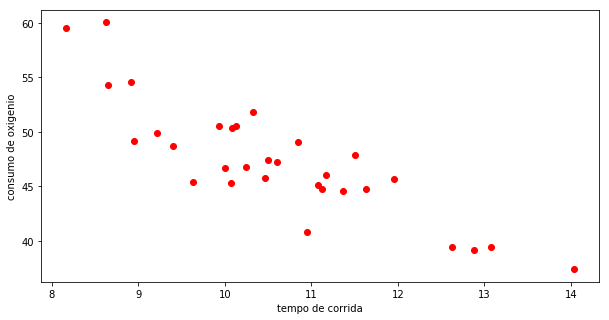

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(oxygen['tempo'],oxygen['oxigenio'],'ro')
plt.xlabel('tempo de corrida')
plt.ylabel('consumo de oxigenio')
plt.show()

Existe uma correlação negativa entre o tempo de corrida e o consumo de oxigênio. Por exemplo, quanto maior for o tempo de corrida menor será o consumo de oxigênio.

#### Análise de Distribuição - Histograma

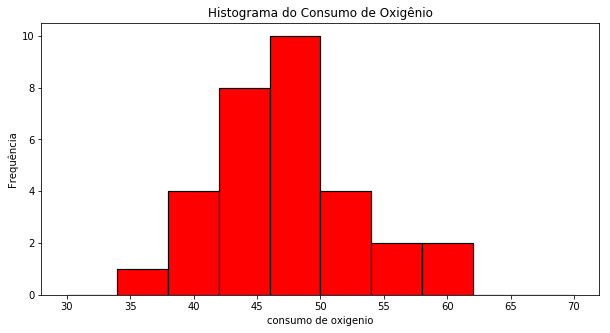

In [4]:
plt.rcParams['figure.figsize'] = [10,5]
plt.hist(oxygen['oxigenio'],bins = 10, range = (30,70), align = 'mid', 
         color = 'red', edgecolor='black', linewidth=1.2)
plt.xlabel('consumo de oxigenio')
plt.ylabel('Frequência')
plt.title("Histograma do Consumo de Oxigênio")
plt.show()

#### Coeficiente de Correlação Linear

Para o cálculo do coeficiente de correlação linear de Pearson é necessária a utilização do pacote ``scipy``.

In [5]:
from scipy.stats.stats import pearsonr
coeficienteCorr = pearsonr(oxygen['tempo'], oxygen['oxigenio'])[0]
print(round(coeficienteCorr,2))

-0.86


O coeficiente de correlação entre o tempo de corrida e o consumo de oxigênio é -0.86. Trata-se de um coeficiente negativo, ou seja, quando maior for o tempo de corrida menor será o consumo de oxigênio, também quanto maior for o consumo de oxigênio menor será o tempo de corrida. Outra informação é que temos uma ``forte correlação negativa`` entre as variáveis.

#### AJuste do Modelo de Regressão Linear Simples

A nossa variável **explicativa** é o **tempo de corrida** e a variável **resposta** é o **consumo de oxigênio**. O modelo adotado para este problema é a regressão linear simples, que é dada pela seguinte equação:
$$y = \beta_0 + \beta_1 x + \epsilon$$
onde $\beta_0$ é uma constante que intercepta o eixo *y* (no caso o eixo do consumo de oxigênio) e $\beta_1$ é o coeficiente angular da reta em relação a variável explicativa.

Para o ajuste de um modelo de regressão linear em Python é necessário utilizar a classe ``LinearRegression`` do pacote ``sklearn``.

In [6]:
from sklearn import datasets, linear_model
linear_model_oxygen = linear_model.LinearRegression()
explicativa = [[x] for x in oxygen['tempo'].values]
resposta = [[y] for y in oxygen['oxigenio'].values]
linear_model_oxygen.fit(explicativa, resposta)
print('\u03B2\u2080:', linear_model_oxygen.intercept_[0])
print('\u03B2\u2081:', linear_model_oxygen.coef_[0][0])

β₀: 82.4217726799
β₁: -3.31055536178


A equação que temos como resposta é:
$$\text{Oxigênio} = 82.4 -3.3\text{tempo} + \epsilon$$

#### Teste de Normalidade - Shapiro-Wilk

Para testar a normalidade dos resíduos do modelo de regressão linear é necessário a aplicação do Teste de Shapiro-Wilk usando o pacote ``scipy``. Neste modelo, o resíduo ($e$) é a diferença entre o valor obtido experimentalmente para o consumo de oxigênio ($y$) e o valor predito de consumo de oxigênio ($\hat{y}$). $$e = y - \hat{y}$$

In [7]:
from scipy import stats
stats.shapiro(resposta - linear_model_oxygen.predict(explicativa))[1]

0.9931714534759521

A normalidade dos resíduos é confirmada pelo teste de normalidade, onde o p-valor obtido é 0.994 que é superior ao  p-valor de corte 0.05.

#### Previsão de Vendas

No item **AJuste do Modelo de Regressão Linear Simples** obtivemos a equação resposta para o problema. Nesta etapa será realizada uma previsão de consumo de oxigênio para um tempo de corrida no valor de 12 minutos.

In [8]:
tempo = 12.0
linear_model_oxygen.predict(tempo)

array([[ 42.69510834]])

#### Ajuste da reta pelo modelo linear

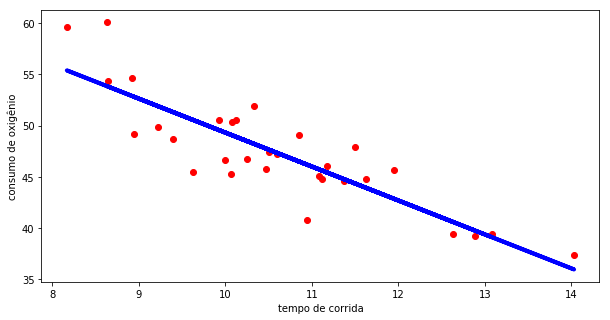

In [9]:
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(oxygen['tempo'], oxygen['oxigenio'],'ro')
predict_oxygen = linear_model_oxygen.predict(explicativa)
plt.plot(oxygen['tempo'], predict_oxygen,color='blue', linewidth = 4)
plt.xlabel('tempo de corrida')
plt.ylabel('consumo de oxigênio')
plt.show()

##### Avaliação da Qualidade do Modelo

O coeficiente de determinação R$^2$, reflete a qualidade do ajuste do modelo. O quanto o modelo consegue explicar o conjunto de dados.

In [10]:
linear_model_oxygen.score(explicativa,resposta)

0.74338010224403228

O modelo consegue explicar somente 74.3% dos dados observados, talvez fosse necessário incluir outras variáveis como indice de massa corpóreo, batimento cardíaco, grau de sedentarismo, etc.